# Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report


import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report


import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Desktop/Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Finding the shape of data
df.shape

(7043, 21)

In [4]:
#7043 rows & 21 columns

In [5]:
#Finding null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values are present in data

In [6]:
#Finding duplicate values
dup=df.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 0


No duplicate values are present in data

In [7]:
#Finding info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
#Finding the unique values
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
df["TotalCharges"].describe().T

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [11]:
#Total charges having wide spaces hence lets check the index numbers of wide spaces present in total charges
df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
#Here we got total 11 rows which is having wide spaces which will impact on dataset
#Replace this wide spaces using Nan values
df["TotalCharges"]=df["TotalCharges"].replace(" ", np.nan)

In [13]:
#finding the null values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
#We have filled nan values in Total charges now we will fill this null values

In [15]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [16]:
df.TotalCharges.dtype

dtype('float64')

In [17]:
#Finding the mean of total charges
np.mean(df["TotalCharges"])

2283.3004408418697

In [18]:
#Filiing the null values with mean
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [19]:
df["TotalCharges"].isna().sum()

0

In [20]:
#We have successfully removed the null values

In [21]:
#Describing the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [22]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

# EDA

<AxesSubplot:xlabel='gender', ylabel='count'>

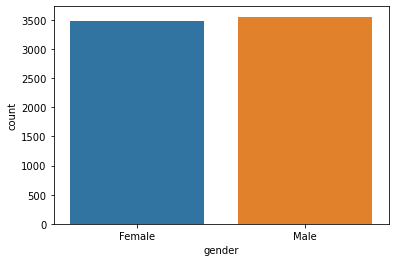

In [23]:
#visualising gender
sns.countplot(df["gender"])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

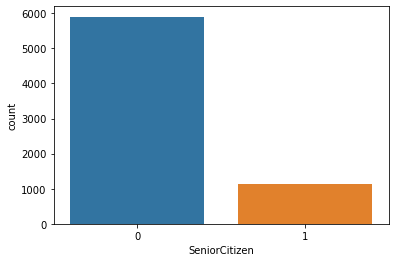

In [24]:
#Finding Senior citizen 
sns.countplot(df["SeniorCitizen"])

Count of Partners are: No     3641
Yes    3402
Name: Partner, dtype: int64


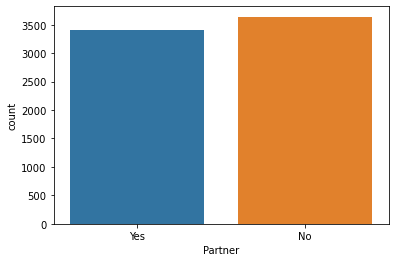

In [3]:
sns.countplot(df["Partner"])
print("Count of Partners are:" ,df["Partner"].value_counts())

Count of Dependents are: No     4933
Yes    2110
Name: Dependents, dtype: int64


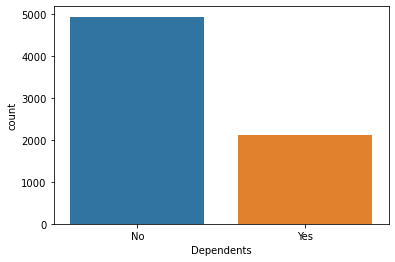

In [26]:
sns.countplot(df["Dependents"])
print("Count of Dependents are:" ,df["Dependents"].value_counts())

<AxesSubplot:xlabel='tenure', ylabel='count'>

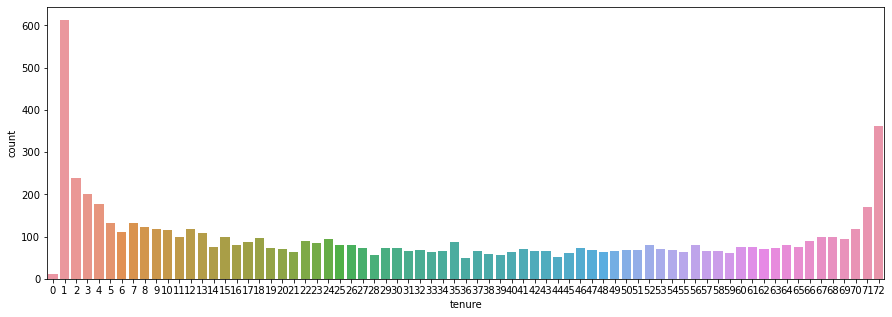

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(df["tenure"])


Count of PhoneService are: Yes    6361
No      682
Name: PhoneService, dtype: int64


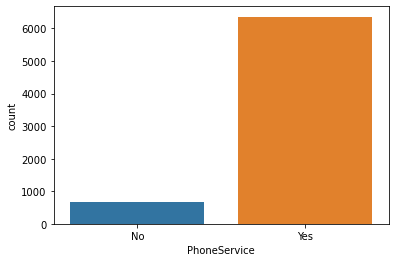

In [28]:
sns.countplot(df["PhoneService"])
print("Count of PhoneService are:" ,df["PhoneService"].value_counts())

Count of MultipleLines are: No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


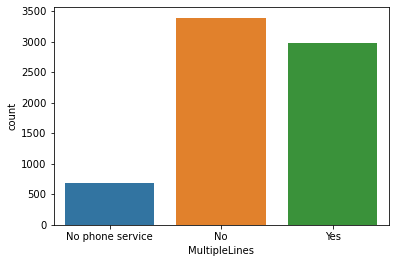

In [29]:


sns.countplot(df["MultipleLines"])
print("Count of MultipleLines are:" ,df["MultipleLines"].value_counts())

Count of InternetService are: Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


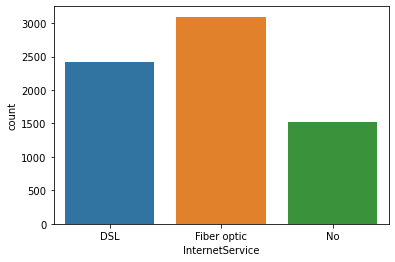

In [30]:


sns.countplot(df["InternetService"])
print("Count of InternetService are:" ,df["InternetService"].value_counts())

Count of OnlineSecurity are: No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


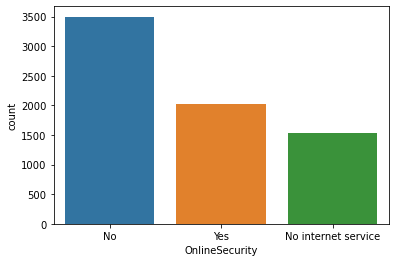

In [31]:


sns.countplot(df["OnlineSecurity"])
print("Count of OnlineSecurity are:" ,df["OnlineSecurity"].value_counts())

Count of OnlineBackup are: No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


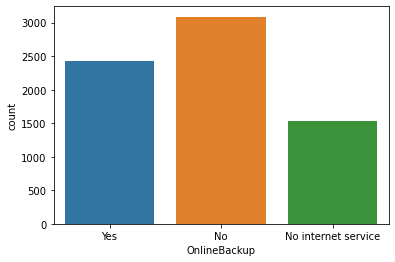

In [32]:


sns.countplot(df["OnlineBackup"])
print("Count of OnlineBackup are:" ,df["OnlineBackup"].value_counts())

Count of DeviceProtection are: No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


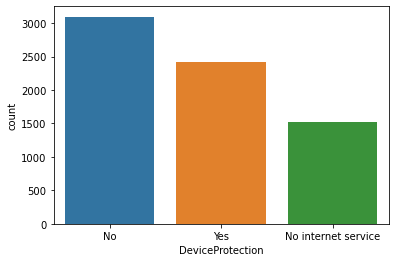

In [33]:


sns.countplot(df["DeviceProtection"])
print("Count of DeviceProtection are:" ,df["DeviceProtection"].value_counts())

Count of TechSupport are: No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


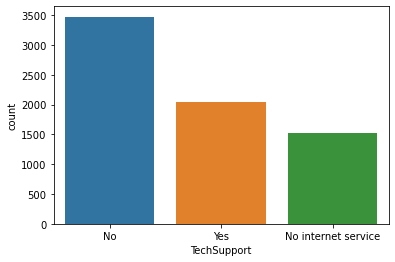

In [34]:


sns.countplot(df["TechSupport"])
print("Count of TechSupport are:" ,df["TechSupport"].value_counts())

Count of StreamingTV are: No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


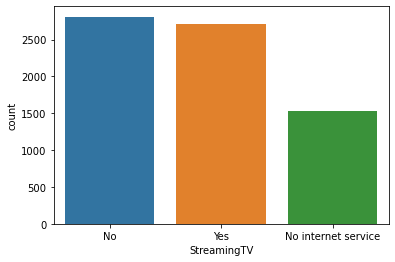

In [35]:
#Visualising Streaming TV

sns.countplot(df["StreamingTV"])
print("Count of StreamingTV are:" ,df["StreamingTV"].value_counts())

Count of StreamingMovies are: No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


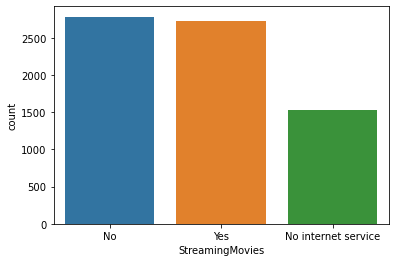

In [36]:
#Visualising Streaming movies

sns.countplot(df["StreamingMovies"])
print("Count of StreamingMovies are:" ,df["StreamingMovies"].value_counts())

Count of Contract are: Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


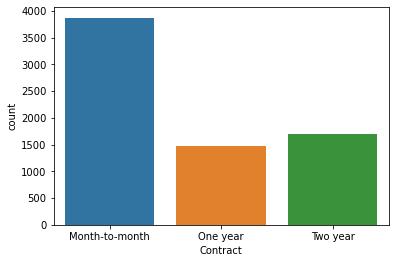

In [37]:
#Visualising contract

sns.countplot(df["Contract"])
print("Count of Contract are:" ,df["Contract"].value_counts())

Count of PaperlessBilling are: Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


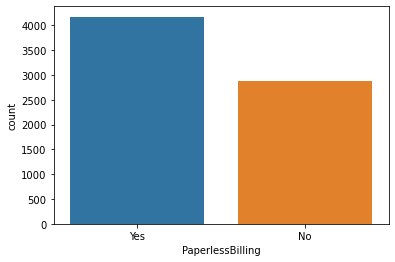

In [38]:
#Visualising Paperless billing

sns.countplot(df["PaperlessBilling"])
print("Count of PaperlessBilling are:" ,df["PaperlessBilling"].value_counts())

Count of PaymentMethod are: Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


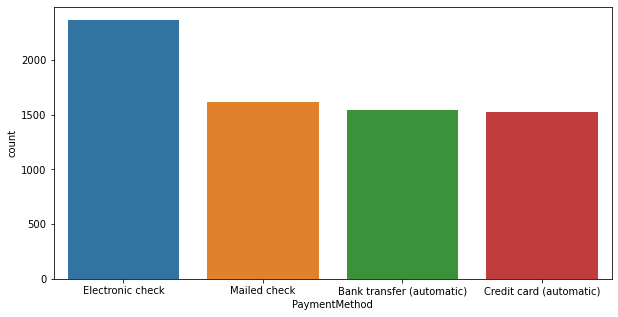

In [40]:
plt.figure(figsize=(10,5))

sns.countplot(df["PaymentMethod"])
print("Count of PaymentMethod are:" ,df["PaymentMethod"].value_counts())

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

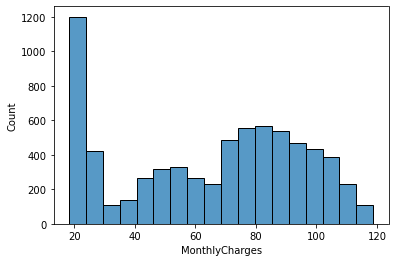

In [41]:

sns.histplot(df["MonthlyCharges"])


<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

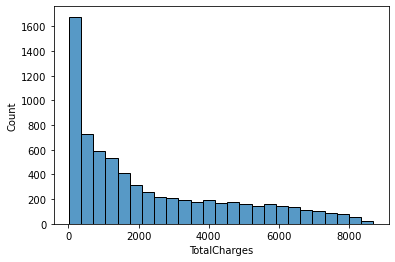

In [42]:

sns.histplot(df["TotalCharges"])


Count of Churn are: No     5174
Yes    1869
Name: Churn, dtype: int64


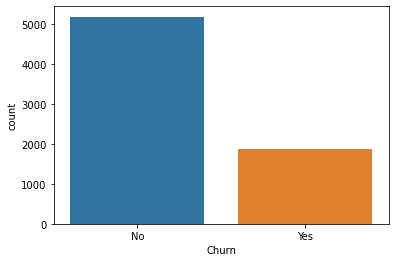

In [75]:
#Plotting the churn column for more visualisation

sns.countplot(df["Churn"])
print("Count of Churn are:" ,df["Churn"].value_counts())

<AxesSubplot:xlabel='SeniorCitizen', ylabel='tenure'>

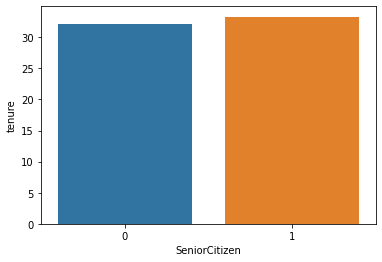

In [101]:
#CustomerID Vs tenure

sns.barplot(x=df["SeniorCitizen"], y=df["tenure"], ci=None)

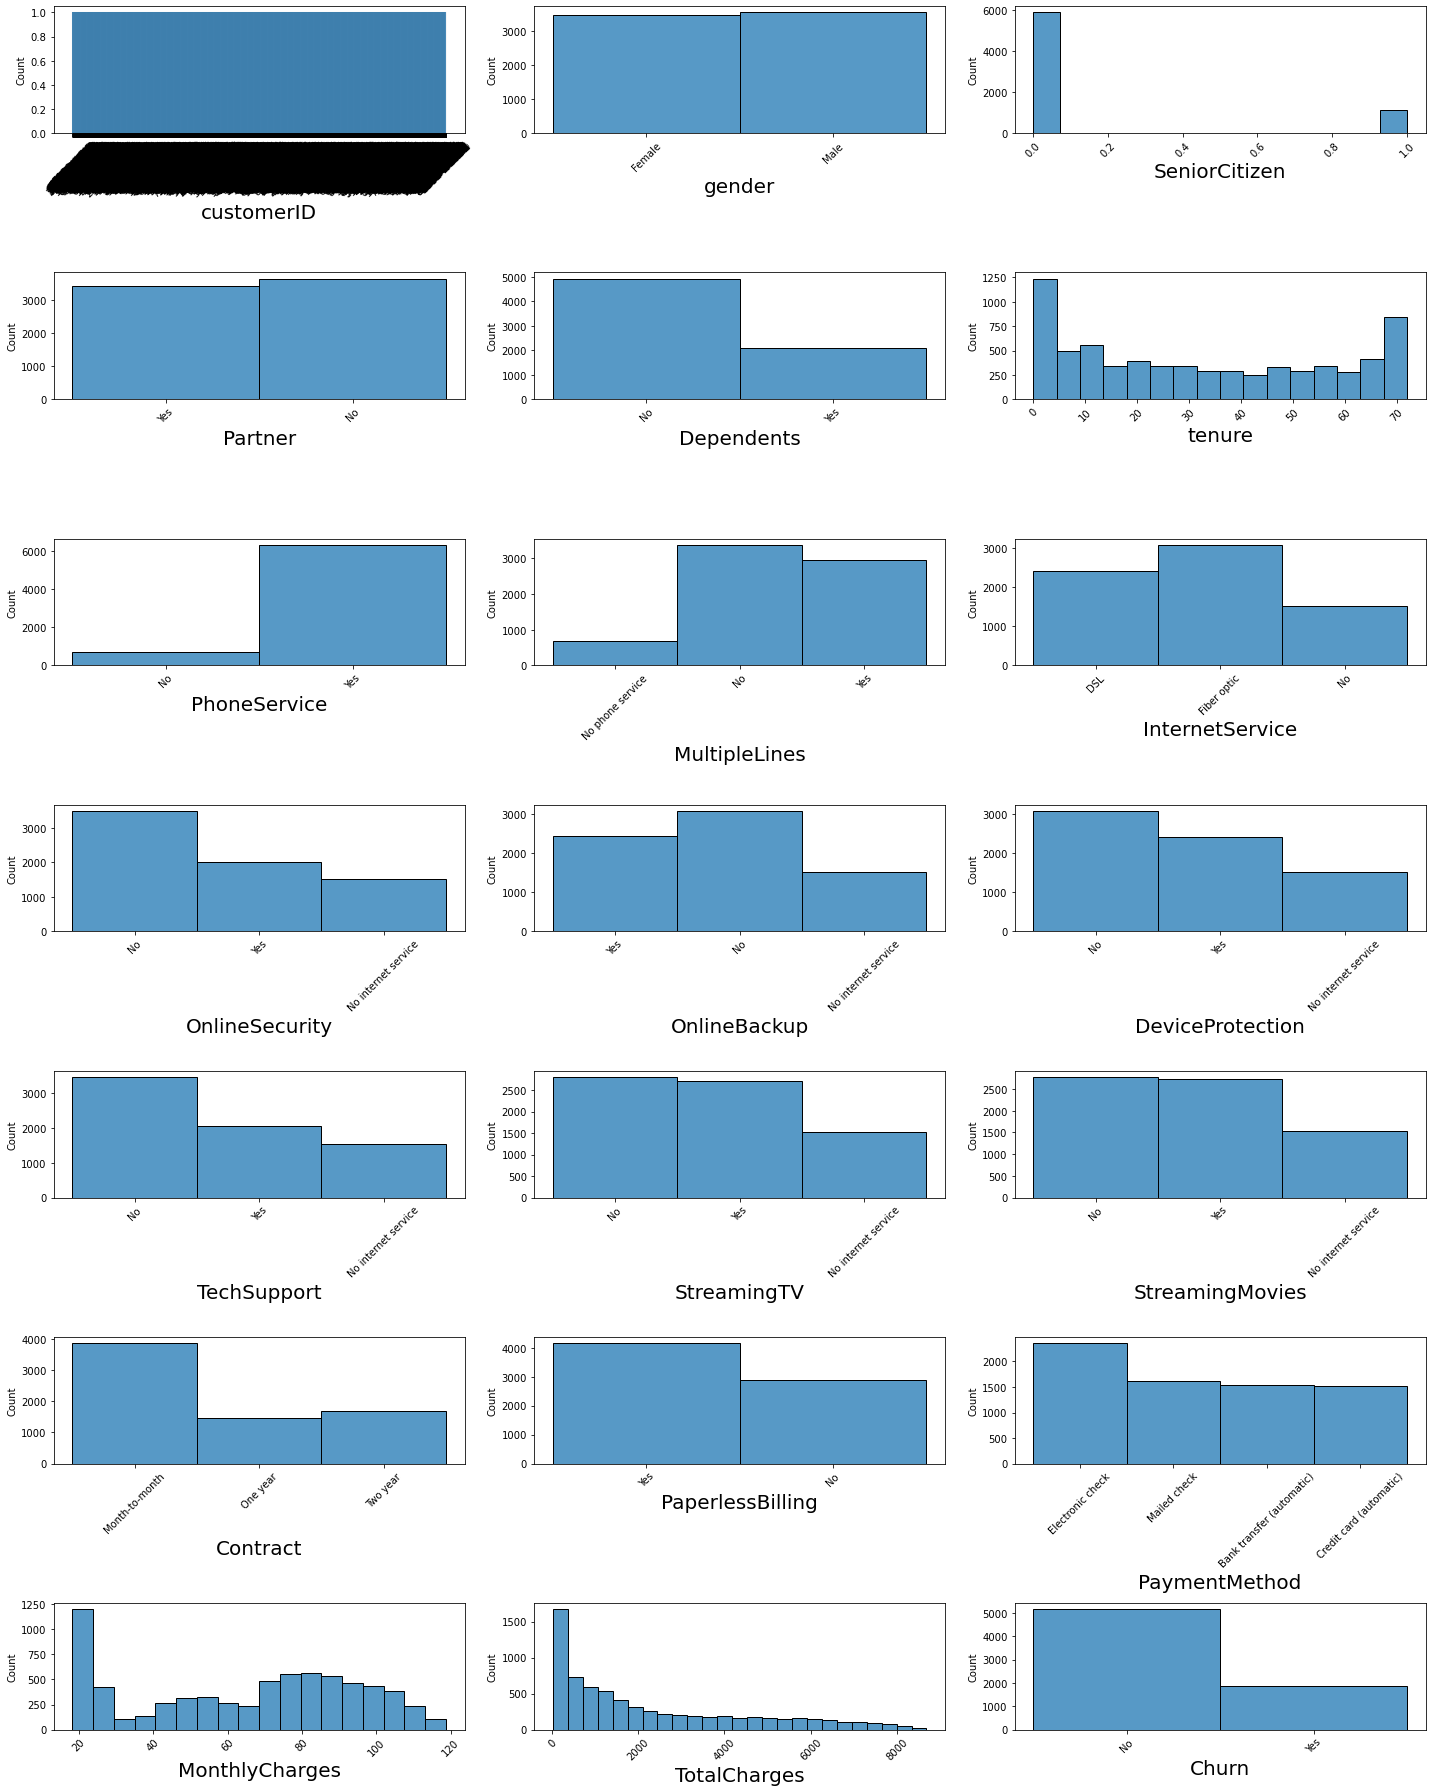

In [185]:
#Lets check data destribution, visualize the dataset

plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=21:
        ax=plt.subplot(7,3, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation = 45)
    plotnumber+=1
    
plt.tight_layout()

In [193]:
x=df.drop(["Churn"], axis=1)
y=df["Churn"]

<AxesSubplot:xlabel='gender', ylabel='count'>

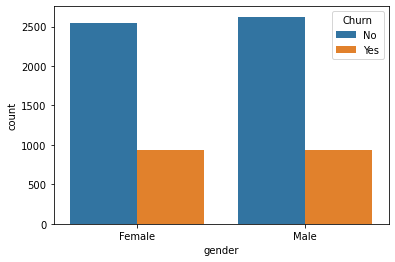

In [43]:
#Plotting customer churn :- Gender Vs Churn
sns.countplot(df["gender"], hue=df["Churn"])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

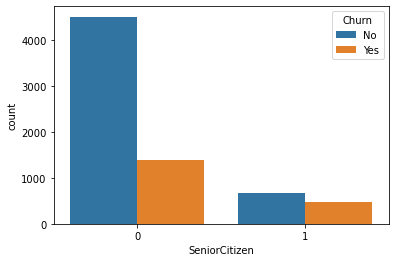

In [44]:
#Plotting customer churn :- SeniorCitizen Vs Churn
sns.countplot(df["SeniorCitizen"], hue=df["Churn"])

<AxesSubplot:xlabel='Partner', ylabel='count'>

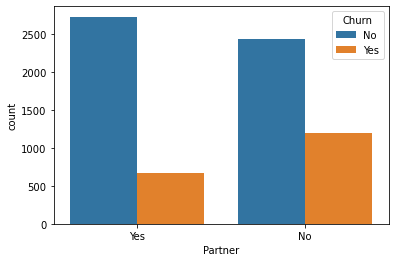

In [46]:
#Plotting customer churn :- Partner Vs Churn
sns.countplot(df["Partner"], hue=df["Churn"])

<AxesSubplot:xlabel='tenure', ylabel='count'>

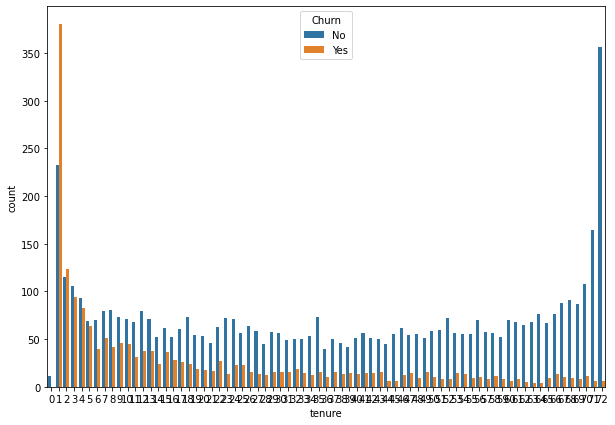

In [52]:
#Plotting customer churn :- tenure Vs Churn
plt.figure(figsize=(10,7))
sns.countplot(df["tenure"], hue=df["Churn"])

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

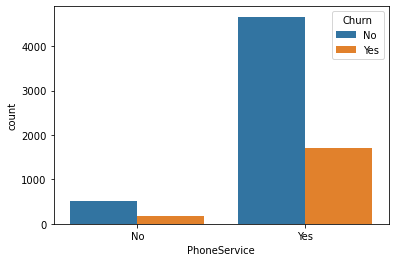

In [53]:
#Plotting customer churn :- PhoneService Vs Churn
sns.countplot(df["PhoneService"], hue=df["Churn"])

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

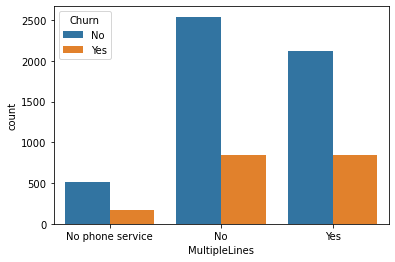

In [57]:
#Plotting customer churn :- MutipleLines Vs Churn
sns.countplot(df["MultipleLines"], hue=df["Churn"])

<AxesSubplot:xlabel='InternetService', ylabel='count'>

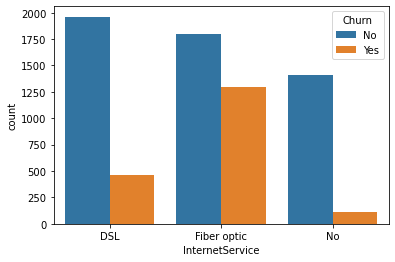

In [58]:
#Plotting customer churn :- InternetService Vs Churn
sns.countplot(df["InternetService"], hue=df["Churn"])

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

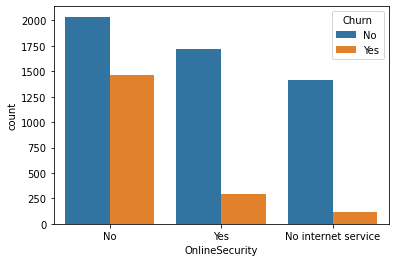

In [59]:
#Plotting customer churn :- OnlineSecurity Vs Churn
sns.countplot(df["OnlineSecurity"], hue=df["Churn"])

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

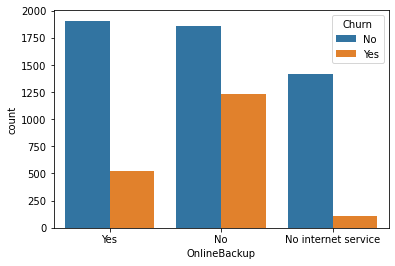

In [60]:
#Plotting customer churn :- OnlineBackup Vs Churn
sns.countplot(df["OnlineBackup"], hue=df["Churn"])

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

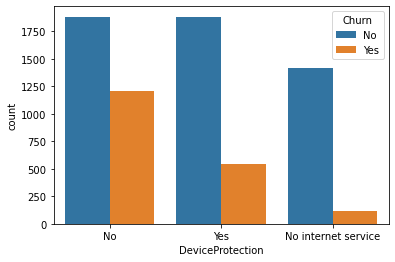

In [61]:
#Plotting customer churn :- DeviceProtection Vs Churn
sns.countplot(df["DeviceProtection"], hue=df["Churn"])

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

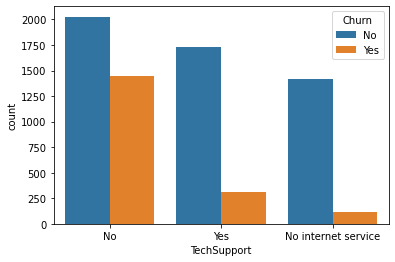

In [62]:
#Plotting customer churn :- TechSupport Vs Churn
sns.countplot(df["TechSupport"], hue=df["Churn"])

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

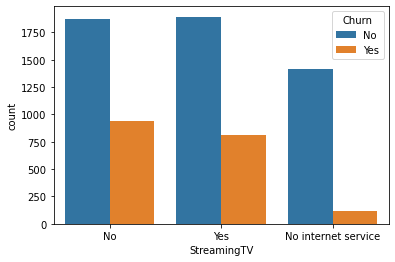

In [63]:
#Plotting customer churn :- StreamingTV Vs Churn
sns.countplot(df["StreamingTV"], hue=df["Churn"])

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

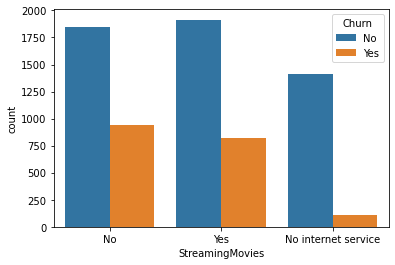

In [64]:
#Plotting customer churn :- StreamingMovies Vs Churn
sns.countplot(df["StreamingMovies"], hue=df["Churn"])

<AxesSubplot:xlabel='Contract', ylabel='count'>

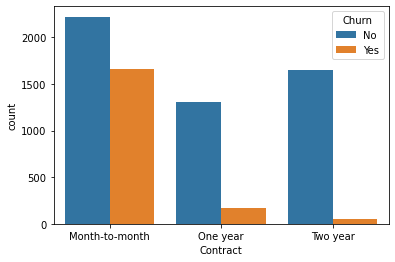

In [65]:
#Plotting customer churn :- Contract Vs Churn
sns.countplot(df["Contract"], hue=df["Churn"])

<Figure size 720x504 with 0 Axes>

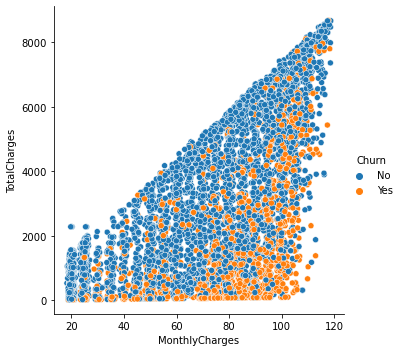

In [74]:
#Plotting customer churn :- MonthlyCharges Vs Churn
plt.figure(figsize=(10,7))
sns.relplot(x=df["MonthlyCharges"], y=df["TotalCharges"] ,hue=df["Churn"])

# Converting catagorical data into numerical using encoder 

In [75]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [76]:
#Lets encode the oject datatype
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=enc.fit_transform(df[i])

In [77]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [78]:
#We have successfully encode the data using Label encoder

In [79]:
#Finding the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [80]:
#Describig the data after encoding
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


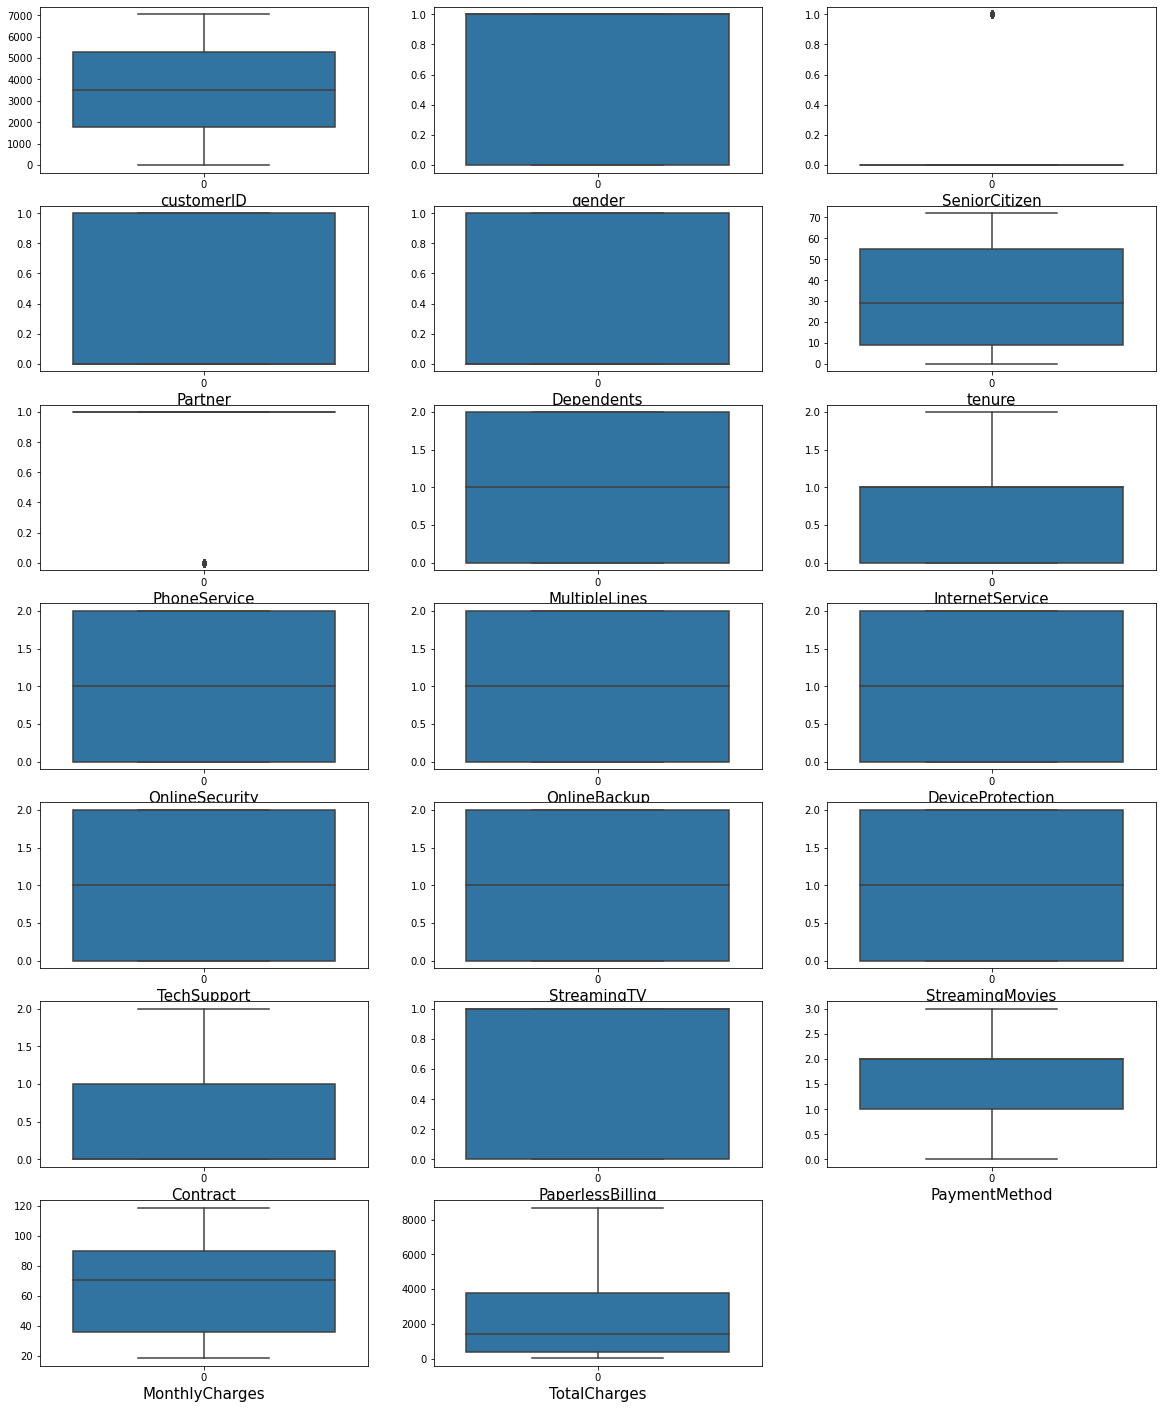

In [82]:
#Visualize the outliers using boxplot

plt.figure(figsize=(20,25))
graph=1

for column in df:
    if graph<=20:
        plt.subplot(7,3, graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=15)
        
    graph+=1
    
plt.show()

In [83]:
#Checking Skewness
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

In [172]:
#We do not remove skewness of categorical columns

# Finding the correlationship between dataset using Heatmap

<AxesSubplot:>

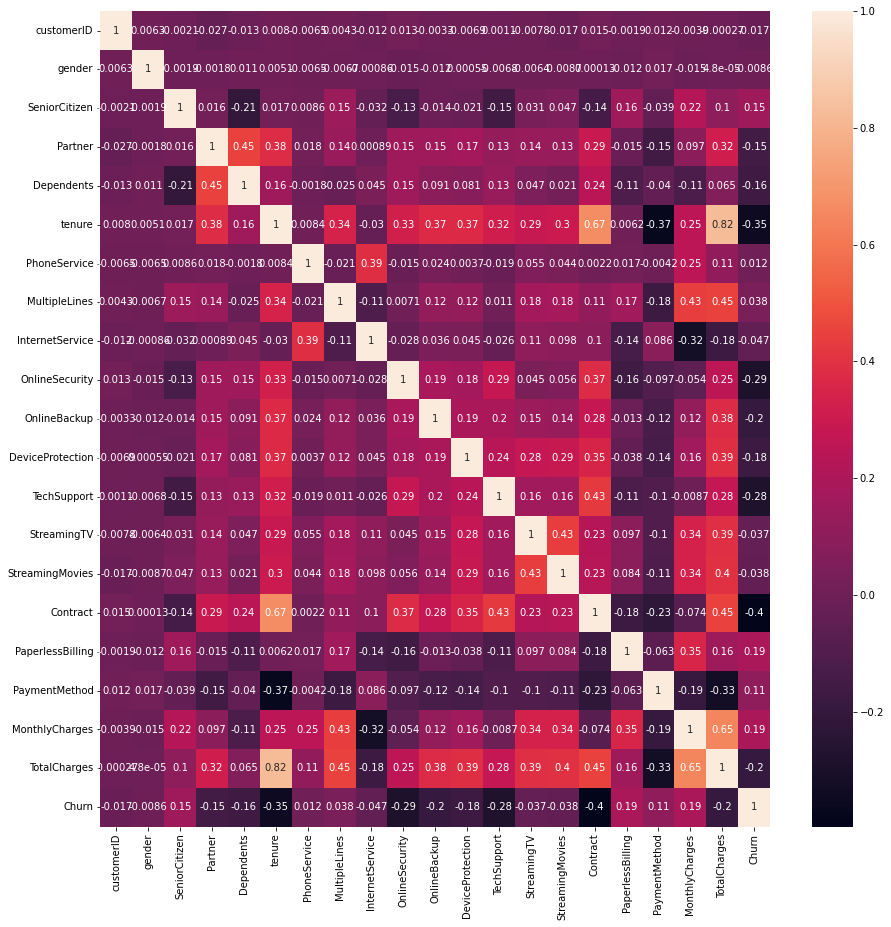

In [84]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr(), annot=True)

In [85]:
# Total Charges & tenure is having highest coleaniarity : 82%

In [86]:
#Seperating feature & label

x=df.drop(["Churn"], axis=1)
y=df["Churn"]

In [87]:
x.shape

(7043, 20)

In [88]:
y.shape

(7043,)

In [89]:
#Scaling of dataset
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [90]:
#Finding Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns

vif


,vif,features
0,1.002557,customerID
1,1.001974,gender
2,1.149760,SeniorCitizen
3,1.462157,Partner
4,1.382370,Dependents
5,7.214940,tenure
6,1.622496,PhoneService
7,1.394365,MultipleLines
8,1.826752,InternetService
9,1.269022,OnlineSecurity


In [91]:
# Total charges having highest multicolinearity : 10,

# Train Test Split

In [92]:
x_train,x_test, y_train,y_test= train_test_split(x_scaled, y, test_size=0.25)

In [93]:
#Write the function & call it is as many as times to check the accuracy score of different model
def metric_score (clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("=============Train Result==============")
        
        print(f"Accuracy score:{accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train== False:
        pred=clf.predict(x_test)
        
        print("=============Test Result==============")
        
        print(f"Accuracy score:{accuracy_score(y_test, pred)*100:.2f}%")
        
        print("\n \n Test Classification report \n ", classification_report(y_test,pred,digits=2)) #For model accuracy
        
        

# Model Initialisation with Decision Tree Classifier

In [94]:
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [95]:
#Call the function & check check train & test score

In [96]:
metric_score(clf, x_train, x_test, y_train, y_test, train=True)

metric_score(clf, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:100.00%
=============Test Result==============
Accuracy score:72.29%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.81      0.80      0.81      1263
           1       0.51      0.52      0.51       498

    accuracy                           0.72      1761
   macro avg       0.66      0.66      0.66      1761
weighted avg       0.72      0.72      0.72      1761



# Parameter Tunning

In [97]:
#We are tunning the parameter , passing different values for oth parameters
param_grid={
    "criterion":["gini","entropy"],
    "max_depth":range(10,15),
    "min_samples_leaf":range(2,6),
    "min_samples_split":range(3,8),
    "max_leaf_nodes":range(5,10)
}

In [98]:
grid_search=GridSearchCV(estimator=clf, param_grid=param_grid,cv=5,n_jobs=-1)

In [99]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [100]:
#Finding best parameters
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 6, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [101]:
#Initiate Decision tree with new parameters & train
clf=DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_leaf_nodes= 6, min_samples_leaf= 2, min_samples_split=3)

#Train the model
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=6, min_samples_leaf=2,
                       min_samples_split=3)

In [102]:
# Call the function & pass the dataset to check train test score
metric_score(clf, x_train, x_test, y_train, y_test, train=True)

metric_score(clf, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:78.95%
=============Test Result==============
Accuracy score:75.81%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.78      0.92      0.85      1263
           1       0.63      0.34      0.45       498

    accuracy                           0.76      1761
   macro avg       0.71      0.63      0.65      1761
weighted avg       0.74      0.76      0.73      1761



In [103]:
#Lets plot confusion matrix
y_pred=clf.predict(x_test)

In [104]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[1164,   99],
       [ 327,  171]], dtype=int64)

In [105]:
#Finding  False positive rate, True positive rate, threshold, AUC, ROC curve.

fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [106]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.        0.0783848 1.       ]
True Positive Rate [0.         0.34337349 1.        ]
Threshold [2 1 0]


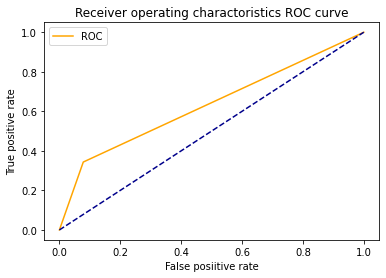

In [107]:
#Plotting ROC curve

plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [108]:
#Finding AUC score
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.6324943479380706


# Lets predict the income using classification model

In [109]:
df.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1
7042,2226,1,0,0,0,66,1,0,1,2,...,2,2,2,2,2,1,0,105.65,6844.50,0


In [119]:
#Saving the model in local file system 
import pickle

pickle.dump(clf, open("cl", "wb"))


In [120]:
loaded_model=pickle.load(open("cl", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

75.809199318569


In [121]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760
Predicted,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
Original,0,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,0,0,1,0


# Using KNN Classifier

In [122]:
#Initiate Kneighbor classifier
knn=KNeighborsClassifier()

#Model Training
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [123]:
# Call the function & pass the dataset to check train test score
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:83.40%
=============Test Result==============
Accuracy score:74.33%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.81      0.84      0.82      1263
           1       0.55      0.51      0.53       498

    accuracy                           0.74      1761
   macro avg       0.68      0.67      0.68      1761
weighted avg       0.74      0.74      0.74      1761



In [ ]:
-Training Accuracy score: 83%.
-Testing accuracy score: 74%
-Precision score: 68%
-Recall: 67%
-F1 score: 68%

In [124]:
#cross validationscore to check if the model is overfitting
from sklearn.model_selection import KFold, cross_val_score

cross_val_score(knn,x_scaled,y, cv=5)


array([0.76863023, 0.75798439, 0.74662881, 0.76207386, 0.75852273])

In [125]:
cross_val_score(KNeighborsClassifier(),x_scaled,y, cv=5).mean()

0.7587680051938834

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
param_grid={"algorithm":["kd_tree","brute"],
           "leaf_size":[3,5,6,7,8],
           "n_neighbors": [3,5,7,9,11,13]}

In [128]:
gridsearch=GridSearchCV(estimator=knn, param_grid=param_grid)

In [129]:
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [130]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [131]:
#We will use best parameters in our knn & check accuracy is increasing
knn=KNeighborsClassifier(algorithm="kd_tree",leaf_size=3, n_neighbors=13)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [132]:
# Call the function & pass the dataset to check train test score
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:80.80%
=============Test Result==============
Accuracy score:76.26%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.82      0.86      0.84      1263
           1       0.59      0.52      0.55       498

    accuracy                           0.76      1761
   macro avg       0.71      0.69      0.70      1761
weighted avg       0.76      0.76      0.76      1761



In [133]:
#Lets plot confusion matrix
y_pred=knn.predict(x_test)


In [134]:
#Plotting the confusion matrix
conf=confusion_matrix(y_test,y_pred)
conf

array([[1083,  180],
       [ 238,  260]], dtype=int64)

In [135]:
#Finding  False positive rate, True positive rate, threshold, AUC, ROC curve.

fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [136]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.14251781 1.        ]
True Positive Rate [0.         0.52208835 1.        ]
Threshold [2 1 0]


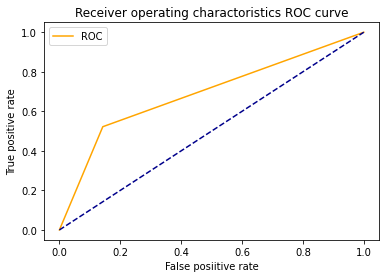

In [137]:
#Plotting ROC curve

plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [138]:
#Saving the model in local file system 
import pickle

pickle.dump(knn, open("kn", "wb"))


In [141]:
loaded_model1=pickle.load(open("kn", "rb"))
result=loaded_model1.score(x_test, y_test)
print(result*100)

76.26348665530949


In [142]:
conclusion=pd.DataFrame([loaded_model1.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760
Predicted,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,1,1,0
Original,0,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,0,0,1,0


# Random Forest

In [143]:
random_clf= RandomForestClassifier()

random_clf.fit(x_train, y_train)

RandomForestClassifier()

In [144]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:100.00%
=============Test Result==============
Accuracy score:78.08%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.81      0.90      0.86      1263
           1       0.66      0.47      0.55       498

    accuracy                           0.78      1761
   macro avg       0.74      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



# Lets tune parameters using GridSearchCV

In [146]:
param={"n_estimators":[13,15],
       "criterion":["entropy","gini"],
       "max_depth":[10,15],
       "min_samples_split":[10,11],
       "min_samples_leaf":[5,6]
       
      }

grd=GridSearchCV(random_clf, param_grid= param)

grd.fit(x_train,y_train)

print("best_params=>", grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 15}


In [147]:
random_clf=RandomForestClassifier(criterion= 'entropy', max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=15)


random_clf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=10, n_estimators=15)

In [148]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:85.02%
=============Test Result==============
Accuracy score:78.82%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.82      0.91      0.86      1263
           1       0.68      0.48      0.56       498

    accuracy                           0.79      1761
   macro avg       0.75      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761



In [149]:
#Lets plot confusion matrix
y_pred=random_clf.predict(x_test)

In [150]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[1148,  115],
       [ 258,  240]], dtype=int64)

In [151]:
#Finding  False positive rate, True positive rate, threshold, AUC, ROC curve.

fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [152]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.09105305 1.        ]
True Positive Rate [0.         0.48192771 1.        ]
Threshold [2 1 0]


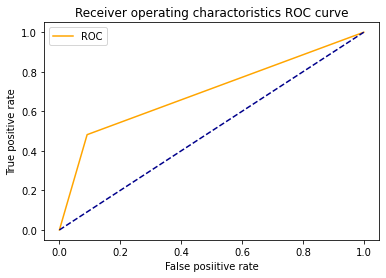

In [153]:
#Plotting ROC curve

plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [154]:
#Finding AUC score
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.6954373312728348


In [156]:
#Saving the model in local file system 
import pickle

pickle.dump(random_clf, open("rn", "wb"))


In [157]:
loaded_model1=pickle.load(open("rn", "rb"))
result=loaded_model1.score(x_test, y_test)
print(result*100)

78.81885292447473


In [158]:
conclusion=pd.DataFrame([loaded_model1.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760
Predicted,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Original,0,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,0,0,1,0


# Logistic Regression

In [159]:
#Model Training

log_reg= LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [160]:
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [161]:
#Finding the accuracy score

accuracy=accuracy_score(y_test, y_pred)
accuracy

0.80465644520159

In [162]:
conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[1132,  131],
       [ 213,  285]], dtype=int64)

In [163]:
from sklearn.metrics import classification_report

In [164]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1263
           1       0.69      0.57      0.62       498

    accuracy                           0.80      1761
   macro avg       0.76      0.73      0.75      1761
weighted avg       0.80      0.80      0.80      1761



In [ ]:
-Testing accuracy score: 80%
-Precision score: 76%
-Recall: 73%
-F1 score: 75%

In [165]:
#Saving the model in local file system 
import pickle

pickle.dump(log_reg, open("rg", "wb"))


In [166]:
loaded_model1=pickle.load(open("rg", "rb"))
result=loaded_model1.score(x_test, y_test)
print(result*100)

80.465644520159


In [167]:
conclusion=pd.DataFrame([loaded_model1.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760
Predicted,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
Original,0,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,0,0,1,0


# Final model loading & prediction Actual Vs Predicted

In [168]:
#Random forest is best model as testing score & CV score is equal : 78%

In [169]:
#Saving the model in local file system 
import pickle

pickle.dump(random_clf, open("rn", "wb"))


In [170]:
loaded_model1=pickle.load(open("rn", "rb"))
result=loaded_model1.score(x_test, y_test)
print(result*100)

78.81885292447473


In [171]:
conclusion=pd.DataFrame([loaded_model1.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760
Predicted,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Original,0,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,0,0,1,0
